In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [24]:
img1 = cv2.imread(r"C:\Users\keshavaram\Downloads\left.jpg")
img2 = cv2.imread(r"C:\Users\keshavaram\Downloads\right.jpg")

In [25]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [26]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

In [27]:
points1 = np.float32([kp1[m.queryIdx].pt for m in matches])
points2 = np.float32([kp2[m.trainIdx].pt for m in matches])

In [28]:
focal_length = 800  # Example focal length
center = (img1.shape[1] / 2, img1.shape[0] / 2)

K = np.array([[focal_length, 0, center[0]],
              [0, focal_length, center[1]],
              [0, 0, 1]])

In [29]:
E, mask = cv2.findEssentialMat(points1, points2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)

In [30]:
points1, points2 = points1[mask.ravel() == 1], points2[mask.ravel() == 1]
_, R, t, mask_pose = cv2.recoverPose(E, points1, points2, K)


In [31]:
P1 = K @ np.hstack((np.eye(3), np.zeros((3, 1))))  # Camera 1
P2 = K @ np.hstack((R, t))

In [32]:
points_4d_hom = cv2.triangulatePoints(P1, P2, points1.T, points2.T)

In [33]:
points_3d = points_4d_hom[:3] / points_4d_hom[3]

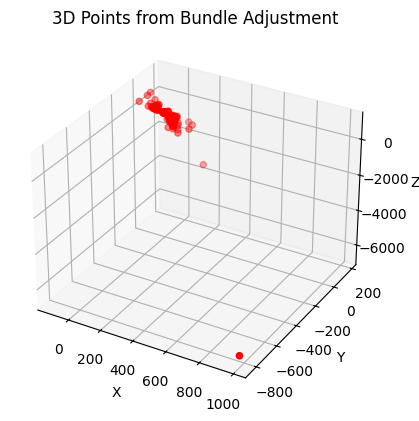

3D Points:
 [[ 3.46766167e+01  4.57066574e+01 -2.65572571e+02]
 [ 1.55247335e+01  6.53814392e+01 -4.16267334e+02]
 [ 8.86596069e+01  1.91308093e+00 -4.72967987e+02]
 [-2.81776848e+01 -3.74223099e+01  3.60671295e+02]
 [-3.90463181e+01 -3.96183472e+01  3.67175842e+02]
 [ 7.02444305e+01 -1.06944294e+01 -3.06638916e+02]
 [-2.59020290e+01 -3.87404251e+01  3.60376068e+02]
 [ 4.27166100e+01  5.64031792e+01 -3.27885468e+02]
 [-2.11735940e+00  7.34847784e+00  5.05365067e+01]
 [ 5.71222725e+01  1.61155014e+01 -3.26279999e+02]
 [-3.06713696e+01 -3.77182198e+01  3.63507965e+02]
 [ 2.23719616e+01  9.54724808e+01 -6.07220337e+02]
 [ 1.25532293e+00  4.63766146e+00  6.17975388e+01]
 [ 4.43981285e+01 -6.92653227e+00 -1.93561707e+02]
 [ 1.53777180e+01  6.31775856e+01 -4.02246826e+02]
 [ 1.99887276e+01  8.74293709e+00  1.08096169e+02]
 [ 2.14367409e+01  9.40096760e+00  1.17293938e+02]
 [-2.77847309e+01 -2.89667721e+01  2.65967560e+02]
 [ 2.91115513e+01  6.84773397e+00 -1.66354492e+02]
 [-4.82869148e+01  

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_3d[0], points_3d[1], points_3d[2], c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Points from Bundle Adjustment')
plt.show()

# Print optimized 3D points
print("3D Points:\n", points_3d.T)